In [1]:
# Install vaderSentiment package for VADER
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.2 MB/s 


In [2]:
# Data processing
import pandas as pd
import numpy as np


# Import VADER sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Import accuracy_score to check performance
from sklearn.metrics import accuracy_score

# Set a wider colwith
pd.set_option('display.max_colwidth', 1000)

In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Change directory
import os
os.chdir("./drive/My Drive/Colab Notebooks/")

# Print out the current directory
!pwd

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks


In [4]:
# Read in data
amz_review = pd.read_csv('Reviews_Filter.csv', sep='\t', names=['review'])

# Take a look at the data
amz_review.head()

,review
0,Good Quality Dog FoodI have bought several of the Vitality canned dog food products and have found them all to be of good quality The product looks more like a stew than a processed meat and it smells better My Labrador is finicky and she appreciates this product better than most;;;;;;;;;
1,Product arrived labeled as Jumbo Salted Peanutsthe peanuts were actually small sized unsalted Not sure if this was an error or if the vendor intended to represent the product as Jumbo;;;;;;;;;
2,This is a confection that has been around a few centuries It is a light pillowy citrus gelatin with nuts - in this case Filberts And it is cut into tiny squares and then liberally coated with powdered sugar And it is a tiny mouthful of heaven Not too chewy and very flavorful I highly recommend this yummy treat If you are familiar with the story of CS Lewis' The Lion The Witch and The Wardrobe - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch;;;;;;;;;
3,Cough MedicineIf you are looking for the secret ingredient in Robitussin I believe I have found it I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda The flavor is very medicinal;;;;;;;;;
4,Great taffyGreat taffy at a great price There was a wide assortment of yummy taffy Delivery was very quick If your a taffy lover this is a deal;;;;;;;;;


In [5]:
# Get sentiment score for each review
vader_sentiment = SentimentIntensityAnalyzer()
amz_review['scores_VADER'] = amz_review['review'].apply(lambda s: vader_sentiment.polarity_scores(s)['compound'])

# Predict sentiment label for each review
amz_review['pred_VADER'] = amz_review['scores_VADER'].apply(lambda x: 1 if x >=0 else 0)
amz_review.head()

,review,scores_VADER,pred_VADER
0,Good Quality Dog FoodI have bought several of the Vitality canned dog food products and have found them all to be of good quality The product looks more like a stew than a processed meat and it smells better My Labrador is finicky and she appreciates this product better than most;;;;;;;;;,0.9583,1
1,Product arrived labeled as Jumbo Salted Peanutsthe peanuts were actually small sized unsalted Not sure if this was an error or if the vendor intended to represent the product as Jumbo;;;;;;;;;,-0.5664,0
2,This is a confection that has been around a few centuries It is a light pillowy citrus gelatin with nuts - in this case Filberts And it is cut into tiny squares and then liberally coated with powdered sugar And it is a tiny mouthful of heaven Not too chewy and very flavorful I highly recommend this yummy treat If you are familiar with the story of CS Lewis' The Lion The Witch and The Wardrobe - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch;;;;;;;;;,0.8138,1
3,Cough MedicineIf you are looking for the secret ingredient in Robitussin I believe I have found it I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda The flavor is very medicinal;;;;;;;;;,0.4404,1
4,Great taffyGreat taffy at a great price There was a wide assortment of yummy taffy Delivery was very quick If your a taffy lover this is a deal;;;;;;;;;,0.9468,1


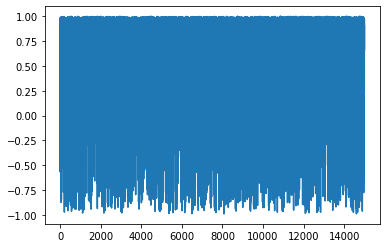

In [8]:
import matplotlib.pyplot as plt
amz_review['scores_VADER'].plot()
plt.show()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 9)
sns.set()
sns.set_context("talk")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


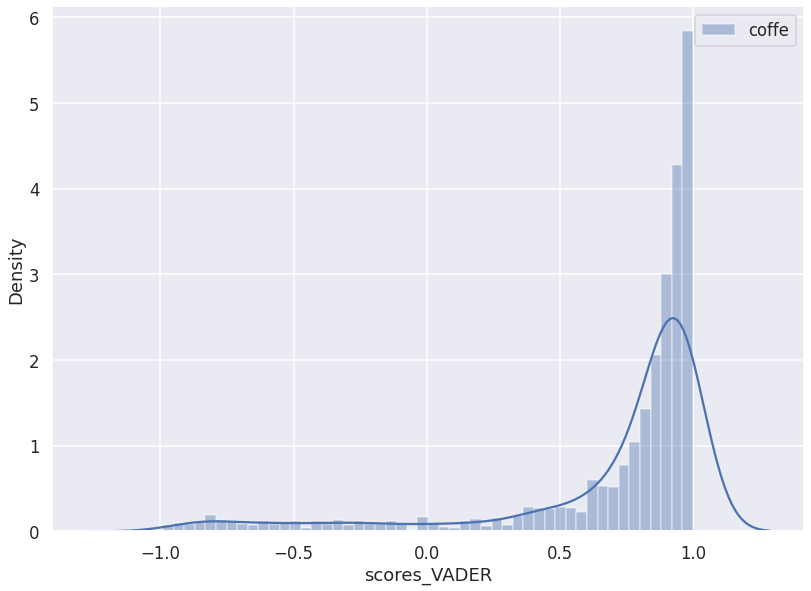

In [17]:
coffe = amz_review[amz_review['review'].str.contains('coffe')]

sns.distplot(coffe['scores_VADER'], hist=True, label='coffe')

plt.legend(title='');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


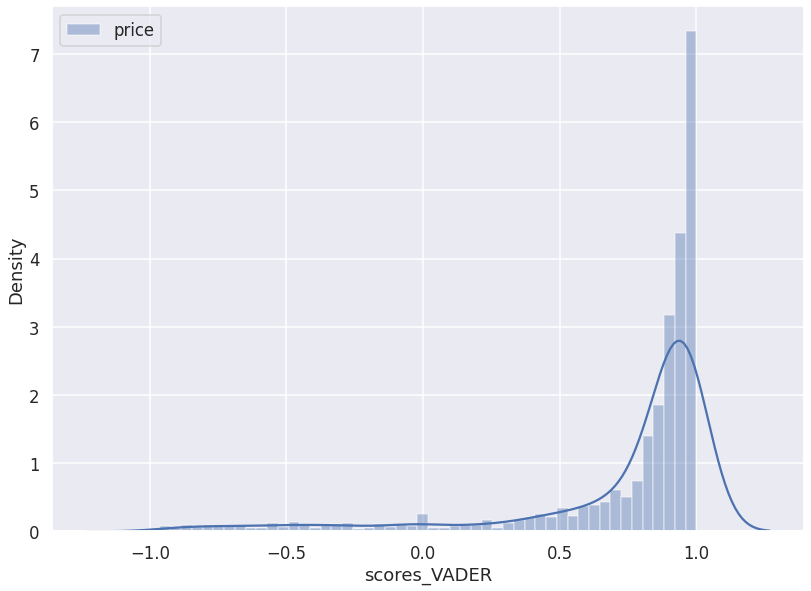

In [18]:
price = amz_review[amz_review['review'].str.contains('price')]

sns.distplot(price['scores_VADER'], hist=True, label='price')

plt.legend(title='');